In [ ]:
import re
import pandas as pd
from collections import Counter
import plotly.express as px
from openTSNE import TSNE
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from transformers import pipeline
import emoji
import numpy as np
import networkx as nx
import plotly.graph_objects as go
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.utils import compute_class_weight
from sklearn.linear_model import LogisticRegression

In [ ]:
'''

pip install wordcloud
pip install openTSNE
pip install emoji

'''

'\n\npip install wordcloud\npip install openTSNE\n\n'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Text Analytics Project/data/haspeede2_dev/haspeede2_dev_taskAB.tsv'

In [ ]:
df = pd.read_csv(file_path, sep='\t', on_bad_lines='warn')

In [ ]:
df

,id,text,hs,stereotype
0,2066,"È terrorismo anche questo, per mettere in uno ...",0,0
1,2045,@user @user infatti finché ci hanno guadagnato...,0,0
2,61,"Corriere: Tangenti, Mafia Capitale dimenticata...",0,0
3,1259,"@user ad uno ad uno, perché quando i migranti ...",0,0
4,949,Il divertimento del giorno? Trovare i patrioti...,0,0
...,...,...,...,...
6832,9340,Gli stati nazionali devono essere pronti a rin...,0,0
6833,9121,Il ministro dell'interno della Germania #Horst...,0,0
6834,8549,#Salvini: In Italia troppi si sono montati la ...,0,0
6835,9240,@user @user Chi giubila in buona fede non ha c...,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6837 entries, 0 to 6836
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          6837 non-null   int64 
 1   text        6837 non-null   object
 2   hs          6837 non-null   int64 
 3   stereotype  6837 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 213.8+ KB


In [ ]:
'''pip install emoji'''

'pip install emoji'

In [ ]:
df['text '] = df['text '].str.replace('�', '', regex=False)


In [ ]:
df.count()

,0
id,6837
text,6837
hs,6837
stereotype,6837


In [ ]:
def extract_emojis(text):
    if not text:
        return ''

    # Regex migliorata per filtrare solo emoji singole
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # Simboli e pittogrammi
        u"\U0001F680-\U0001F6FF"  # Trasporti
        u"\U0001F700-\U0001F77F"
        u"\U0001F780-\U0001F7FF"  # Simboli geometrici estesi
        u"\U0001F800-\U0001F8FF"
        u"\U0001F900-\U0001F9FF"  # Faccine estese
        u"\U0001FA00-\U0001FA6F"
        u"\U0001FA70-\U0001FAFF"
        "]+",
        flags=re.UNICODE,
    )

    return ''.join(emoji_pattern.findall(text))

# Estrazione delle emoji
df['emojis'] = df['text '].apply(extract_emojis)


all_emojis = ''.join(df['emojis'])
emoji_frequencies = Counter(all_emojis)


sorted_emoji_frequencies = dict(sorted(emoji_frequencies.items(), key=lambda item: item[1], reverse=True))

print("Frequenze delle emoji:")
for emoji_char, freq in sorted_emoji_frequencies.items():
    print(f"{emoji_char}: {freq}")

emoji_df = pd.DataFrame(sorted_emoji_frequencies.items(), columns=['Emoji', 'Frequenza'])

top_10_emojis = emoji_df.head(10)
fig = px.bar(top_10_emojis, x='Emoji', y='Frequenza', title='Top 10 Frequenze delle Emoji')
fig.show()


Frequenze delle emoji:
😡: 70
😂: 57
👎: 32
🤣: 27
😁: 25
🤔: 23
💩: 23
👍: 16
😠: 14
👿: 14
👏: 13
🤮: 13
😭: 13
🙄: 11
😤: 11
🤦: 11
🖕: 10
😳: 9
😄: 9
🔹: 7
😈: 7
😱: 7
🔴: 7
😣: 7
😢: 6
🏻: 6
😨: 6
🤢: 6
🧐: 6
👇: 5
🌟: 5
👉: 5
🙈: 4
😀: 4
😷: 4
😎: 4
🤬: 4
😔: 4
🐒: 4
😑: 3
🤕: 3
😉: 3
😊: 3
💥: 3
😒: 3
🏿: 3
😬: 3
💃: 3
😆: 3
😲: 2
🔥: 2
😅: 2
💖: 2
🌿: 2
📍: 2
😜: 2
🌍: 2
🤨: 2
🌈: 2
😐: 2
😘: 2
🖊: 2
👀: 2
🤫: 2
💚: 2
🏾: 2
🙂: 1
🏼: 1
🤓: 1
👌: 1
👹: 1
💣: 1
🕌: 1
🤡: 1
🕋: 1
🖒: 1
😥: 1
💬: 1
🍸: 1
🤪: 1
🤚: 1
😟: 1
👋: 1
😫: 1
💔: 1
🚫: 1
🌹: 1
📆: 1
📢: 1
📺: 1
🔽: 1
👈: 1
📌: 1
😩: 1
👊: 1
🦅: 1
🍷: 1
🍺: 1
🐖: 1
🐓: 1
🏐: 1
🤐: 1
🌏: 1
📖: 1
👕: 1
🙏: 1
🔫: 1
😯: 1
🎄: 1
🐜: 1
😪: 1


In [ ]:
print(df['emojis'].unique())


['' '🙂' '😲' '😠' '🙄' '😁' '😑' '😂😂' '👍🏼' '😳🙄🤔🤓😂😂😂😂😂' '😡' '😄😄😄😄😄😄' '🤔🤔🤔' '🔥🔥'
 '😅' '😳' '🤕' '😳😳😉' '😢' '😊👍' '🔹🔹' '👎' '💖' '😈' '👌' '😂😂😂😂😂😂' '😱😱😱' '👹' '🌿🌿'
 '🤔' '😂🙈' '🤔😂' '😀👍' '📍' '😁😁😁' '😜' '💣💥' '👍' '💩💩💩💩' '😒' '😷' '🕌💥🌍🤡🕋' '👏😡' '🖒'
 '😥' '🙄🙄😤😤😤' '🔴🔴👇🏿' '💩💩' '🙄🤔🤨' '😣😣' '🤔💥' '💩' '😤' '🤦🤦🤣🤣🤣🤣' '🤣🤣🤣😂😂😂😁😁😁'
 '😂😂😂😂😂😎' '😂😂😂🖕🖕🖕' '😠😠😠😠😠😠' '🖕🖕🖕🖕🖕' '😡😬' '🤮' '😂' '💬' '🍸' '🌈🌈🤪🏻' '🌟🌟🌟🌟🌟'
 '😐' '🤔😡👿' '🔹🔹🔹' '😘' '😠😠' '🤚' '😤😤😤😤' '🤨😟😡😡😡😡' '😀😀' '😄😄👋🏻' '😡😡😡' '😈😭😫' '💔😭'
 '🚫' '🌹' '📆📍📢' '😊' '😎' '🤣🤣🤣' '👉🏻' '🤣🤣' '🤣' '📺' '🔽' '😤🤔' '👍👍👏👏😊' '💃💃💃👉👈'
 '🙈🙈' '😨' '😂😂😂😂💩💩' '🤦🤦🤦🤦🤦' '🖊📌' '🙄👿' '👏' '👏👏👏' '👇' '😁😂' '😡😡' '😁😉'
 '👍👍👍👍👏👏👏👏👏👿👿👿👿👿👿' '👀🙈🤦' '🤬🤦' '🖕🏿👎🏿' '😒😑😒' '😔😷' '😣😣😣' '🔴' '🤫🤫' '😬😳😩😤' '👊'
 '😂🙄' '🦅' '😂😂😂😂' '👎👎' '👎👎👎' '😱' '🤢🤢👿👿🤕🤕😨😨😨' '🍷🍺' '👀😬' '💩💩😡😡😡'
 '😡😡😡😡😡😡😡😡😡😡😡😡😡😡😡' '👎👎😠😠' '👍👍👍👍' '🤣🤣🤣🤣🤣🖕' '😂😂😂😂😂' '🐖🐓' '😡😡😡😡😡' '🏐'
 '🤮🤮🤮🤮🤮🐒🐒🐒🐒' '💩🤢🤮' '😁😁😁😁' '🤐🤬' '😳😅😂👎👎👎👎' '😁🤢🤢🤢' '💚💚' '🧐🧐🧐🧐🧐🧐' '😔' '😭😭😭😭'
 '😉👉🏻' '🤦' '😈😆😷' '🤔🤔' '🌏📖' '🤮🤮🤮' '💩😐' '👍😄' '😳😆' '💩💩💩' '🤬' '👕' '😡😡😡😡' '😭'
 '😡😡😡😡👿👿👿👿' '😀🤣😂' '🤔🙏' '👎👎👎👎👎👎👎' '😁😆' '🔫😯' '🔴😂' '😔😢' '👎👎👎👎👎👎' '🎄' '🖊'
 '👉🏾

In [ ]:
emoji_rows = df[df['emojis'] != '']
print(emoji_rows[['text ', 'emojis']])


                                                  text  emojis
24    #AleppoLibera dai #terroristifiloccidentali to...      🙂
77    Oddio!! 😲 il corriere ha scritto #rom #ladre n...      😲
149   E qui non possiamo dire che temiamo gli islami...      😠
150   @user scusa ma dovevo tacere sti stranieri che...      🙄
158   Di ciò che dice il rom approvo solo ke dice IL...      😁
...                                                 ...    ...
6727  #CagliariAggredito e rapinato da 4 stranieri u...      😔
6758  Se non puoi dar da mangiare ai tuoi figli,non ...   🤔😡😡😡
6806  @user @user Questi analfabeti che schifate tan...   😂😂😂😂
6815  Procura contesta a #MimmoLucano:•associazione ...     🤦🏻
6831  Leader #africani contro l'#immigrazione: "i no...      🤬

[260 rows x 2 columns]


#  Esplorazione delle emoji più usate

In [ ]:
# Percentuale di tweet con emoji
total_tweets = len(df)
tweets_with_emojis = len(df[df['emojis'] != ''])
percent_with_emojis = (tweets_with_emojis / total_tweets) * 100
print(f"Percentuale di tweet con emoji: {percent_with_emojis:.2f}%")

emoji_df = pd.DataFrame(emoji_frequencies.items(), columns=['Emoji', 'Frequenza'])
fig = px.bar(emoji_df.sort_values(by='Frequenza', ascending=False), x='Emoji', y='Frequenza', title='Frequenza di tutte le Emoji')
fig.show()


Percentuale di tweet con emoji: 3.80%


# Correlazione tra emoji e variabili

In [ ]:
# ======= ------------------------------------------------------------- =======
def calculate_emoji_frequencies(group_col, emoji_col):
    """
    Calcola le frequenze delle emoji raggruppate per una colonna specifica.

    Parametri:
        group_col: colonna del gruppo (es. 'hs' o 'stereotype')
        emoji_col: colonna con le emoji

    Ritorna:
        Un DataFrame con le frequenze delle emoji per ogni valore del gruppo.
    """
    groups = df.groupby(group_col)[emoji_col].apply(lambda x: ''.join(x))
    emoji_freq = groups.apply(lambda x: Counter(x)).to_dict()
    return pd.DataFrame(emoji_freq).fillna(0)

# ======= ------------------------------------------------------------ =======
hs_emoji_df = calculate_emoji_frequencies('hs', 'emojis')
print("Frequenze di Emoji per 'hs':")
print(hs_emoji_df.head())

for hs_value in hs_emoji_df.columns:
    print(f"\nFrequenze per hs = {hs_value}:")
    print(hs_emoji_df[hs_value].sort_values(ascending=False).head(10))

# ======= ------------------------------------------------------------ =======
stereotype_emoji_df = calculate_emoji_frequencies('stereotype', 'emojis')
print("Frequenze di Emoji per 'stereotype':")
print(stereotype_emoji_df.head())

# Frequenze stereotype
for stereotype_value in stereotype_emoji_df.columns:
    print(f"\nFrequenze per stereotype = {stereotype_value}:")
    print(stereotype_emoji_df[stereotype_value].sort_values(ascending=False).head(10))

# ======= ------------------------------------------------------------- =======

hs_emoji_df['Emoji'] = hs_emoji_df.index
hs_emoji_melted = hs_emoji_df.melt(id_vars='Emoji', var_name='HS Group', value_name='Frequency')


fig = px.bar(
    hs_emoji_melted,
    x='Emoji',
    y='Frequency',
    color='HS Group',
    barmode='group',
    title='Distribuzione delle Emoji per Gruppo HS',
    labels={'Frequency': 'Frequenza', 'HS Group': 'Gruppo HS'}
)
fig.show()

# ======= ------------------------------------------------------------- =======

emoji_binary = df['emojis'].apply(lambda x: Counter(x))
emoji_binary_df = pd.DataFrame(list(emoji_binary)).fillna(0)

emoji_binary_df['hs'] = df['hs']
emoji_binary_df['stereotype'] = df['stereotype']

# ======= Correlazione hs =======
correlation_hs = emoji_binary_df.corr()['hs'].sort_values(ascending=False)
print("\nCorrelazione con 'hs':")
print(correlation_hs)

top_correlated_hs = correlation_hs.head(10).drop('hs')
fig = px.bar(
    top_correlated_hs,
    x=top_correlated_hs.index,
    y=top_correlated_hs.values,
    title='Top Emoji Correlate con HS',
    labels={'x': 'Emoji', 'y': 'Correlazione'}
)
fig.show()

# ======= 6. Correlazione stereotype =======
correlation_stereotype = emoji_binary_df.corr()['stereotype'].sort_values(ascending=False)
print("\nCorrelazione con 'stereotype':")
print(correlation_stereotype)

top_correlated_stereotype = correlation_stereotype.head(10).drop('stereotype')
fig = px.bar(
    top_correlated_stereotype,
    x=top_correlated_stereotype.index,
    y=top_correlated_stereotype.values,
    title='Top Emoji Correlate con Stereotype',
    labels={'x': 'Emoji', 'y': 'Correlazione'}
)
fig.show()


Frequenze di Emoji per 'hs':
     0     1
🙂  1.0   0.0
😲  2.0   0.0
😠  1.0  13.0
🙄  7.0   4.0
😁  9.0  16.0

Frequenze per hs = 0:
😂    30.0
🤔    14.0
👎    13.0
😡    12.0
😭    10.0
🤣    10.0
😁     9.0
🙄     7.0
🤦     7.0
🧐     6.0
Name: 0, dtype: float64

Frequenze per hs = 1:
😡    58.0
😂    27.0
💩    21.0
👎    19.0
🤣    17.0
😁    16.0
👿    14.0
😠    13.0
🤮    12.0
👍    11.0
Name: 1, dtype: float64
Frequenze di Emoji per 'stereotype':
     0     1
🙂  1.0   0.0
🙄  6.0   5.0
😁  9.0  16.0
👍  4.0  12.0
🏼  1.0   0.0

Frequenze per stereotype = 0:
😂    27.0
😡    22.0
🤣    14.0
🤔    13.0
👎    12.0
😁     9.0
😠     7.0
🤮     6.0
😄     6.0
🧐     6.0
Name: 0, dtype: float64

Frequenze per stereotype = 1:
😡    48.0
😂    30.0
👎    20.0
💩    17.0
😁    16.0
🤣    13.0
👍    12.0
🖕    10.0
👿    10.0
🤔    10.0
Name: 1, dtype: float64



Correlazione con 'hs':
hs            1.000000
stereotype    0.472379
💩             0.037542
😡             0.037455
👿             0.026978
                ...   
🖊            -0.014100
💖            -0.014100
😲            -0.014100
😊            -0.017270
👉            -0.018844
Name: hs, Length: 113, dtype: float64



Correlazione con 'stereotype':
stereotype    1.000000
hs            0.472379
👇             0.030225
💥             0.023409
😑             0.023409
                ...   
🧐            -0.010825
📍            -0.015311
🖊            -0.015311
💖            -0.015311
👉            -0.020462
Name: stereotype, Length: 113, dtype: float64


Calcolo delle frequenze di emoji:

    calculate_emoji_frequencies è una funzione che calcola le frequenze di emoji per qualsiasi colonna di gruppo (hs o stereotype).
    Le frequenze sono mostrate in formato tabellare e nei grafici.

Grafici delle distribuzioni:

    Viene creato un grafico a barre interattivo per visualizzare la distribuzione delle emoji per ciascun valore di hs.

Matrice binaria per emoji:

    Ogni emoji è convertita in un vettore binario per calcolare le correlazioni con variabili target (hs e stereotype).

Calcolo delle correlazioni:

    Le emoji più correlate con hs e stereotype sono identificate e visualizzate nei grafici.

Output
1.   Tabella delle frequenze di emoji per hs e stereotype.
2.   Grafico interattivo della distribuzione delle emoji per hs.
3.   Lista delle emoji più correlate con hs e stereotype.
4.   Grafici delle emoji più fortemente correlate con le variabili target.

    
    
    

# ANALISI

In [ ]:
df

,id,text,hs,stereotype,emojis
0,2066,"È terrorismo anche questo, per mettere in uno ...",0,0,
1,2045,@user @user infatti finché ci hanno guadagnato...,0,0,
2,61,"Corriere: Tangenti, Mafia Capitale dimenticata...",0,0,
3,1259,"@user ad uno ad uno, perché quando i migranti ...",0,0,
4,949,Il divertimento del giorno? Trovare i patrioti...,0,0,
...,...,...,...,...,...
6832,9340,Gli stati nazionali devono essere pronti a rin...,0,0,
6833,9121,Il ministro dell'interno della Germania #Horst...,0,0,
6834,8549,#Salvini: In Italia troppi si sono montati la ...,0,0,
6835,9240,@user @user Chi giubila in buona fede non ha c...,0,0,


# Sentiment Analysis

In [ ]:
emoji_list =['', '🙂', '😲', '😠', '🙄', '😁', '😑', '😂😂', '👍🏼', '😳🙄🤔🤓😂😂😂😂😂', '😡',
       '😄😄😄😄😄😄', '🤔🤔🤔', '🔥🔥', '😅', '😳', '🤕', '😳😳😉', '😢', '😊👍', '🔹🔹', '👎',
       '💖', '😈', '👌', '😂😂😂😂😂😂', '😱😱😱', '👹', '🌿🌿', '🤔', '😂🙈', '🤔😂', '😀👍',
       '📍', '😁😁😁', '😜', '💣💥', '👍', '💩💩💩💩', '😒', '😷', '🕌💥🌍🤡🕋', '👏😡', '🖒',
       '😥', '🙄🙄😤😤😤', '🔴🔴👇🏿', '💩💩', '🙄🤔🤨', '😣😣', '🤔💥', '💩', '😤', '🤦🤦🤣🤣🤣🤣',
       '🤣🤣🤣😂😂😂😁😁😁', '😂😂😂😂😂😎', '😂😂😂🖕🖕🖕', '😠😠😠😠😠😠', '🖕🖕🖕🖕🖕', '😡😬', '🤮', '😂',
       '💬', '🍸', '🌈🌈🤪🏻', '🌟🌟🌟🌟🌟', '😐', '🤔😡👿', '🔹🔹🔹', '😘', '😠😠', '🤚',
       '😤😤😤😤', '🤨😟😡😡😡😡', '😀😀', '😄😄👋🏻', '😡😡😡', '😈😭😫', '💔😭', '🚫', '🌹',
       '📆📍📢', '😊', '😎', '🤣🤣🤣', '👉🏻', '🤣🤣', '🤣', '📺', '🔽', '😤🤔', '👍👍👏👏😊',
       '💃💃💃👉👈', '🙈🙈', '😨', '😂😂😂😂💩💩', '🤦🤦🤦🤦🤦', '🖊📌', '🙄👿', '👏', '👏👏👏', '👇',
       '😁😂', '😡😡', '😁😉', '👍👍👍👍👏👏👏👏👏👿👿👿👿👿👿', '👀🙈🤦', '🤬🤦', '🖕🏿👎🏿', '😒😑😒',
       '😔😷', '😣😣😣', '🔴', '🤫🤫', '😬😳😩😤', '👊', '😂🙄', '🦅', '😂😂😂😂', '👎👎',
       '👎👎👎', '😱', '🤢🤢👿👿🤕🤕😨😨😨', '🍷🍺', '👀😬', '💩💩😡😡😡', '😡😡😡😡😡😡😡😡😡😡😡😡😡😡😡',
       '👎👎😠😠', '👍👍👍👍', '🤣🤣🤣🤣🤣🖕', '😂😂😂😂😂', '🐖🐓', '😡😡😡😡😡', '🏐', '🤮🤮🤮🤮🤮🐒🐒🐒🐒',
       '💩🤢🤮', '😁😁😁😁', '🤐🤬', '😳😅😂👎👎👎👎', '😁🤢🤢🤢', '💚💚', '🧐🧐🧐🧐🧐🧐', '😔',
       '😭😭😭😭', '😉👉🏻', '🤦', '😈😆😷', '🤔🤔', '🌏📖', '🤮🤮🤮', '💩😐', '👍😄', '😳😆',
       '💩💩💩', '🤬', '👕', '😡😡😡😡', '😭', '😡😡😡😡👿👿👿👿', '😀🤣😂', '🤔🙏', '👎👎👎👎👎👎👎',
       '😁😆', '🔫😯', '🔴😂', '😔😢', '👎👎👎👎👎👎', '🎄', '🖊', '👉🏾👉🏾', '😭😭😭😢😢😢😭😭😭',
       '🐜🤣🤣🤣', '😪', '🌍', '🤔😁', '👇🏻', '🤔😡😡😡', '🤦🏻']

# PROBABILE SOLUZIONE

In [ ]:
# Inizializza il pipeline di sentiment analysis
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")

# Pulizia dei nomi
def clean_emoji_name(name):
    return re.sub(r'[:_]', ' ', name)

# Trasformare ogni emoji in testo e analisi
emoji_descriptions = {e: clean_emoji_name(emoji.demojize(e)) for e in emoji_list}

emoji_sentiments = {
    e: sentiment_pipeline(f"This emoji represents: {desc}")[0]['label']
    for e, desc in emoji_descriptions.items() if desc.strip()  # Evita testi vuoti
}

# Classifica delle emoji
sentiment_mapping = {
    e: 'positive' if sentiment == 'LABEL_2' else 'negative' if sentiment == 'LABEL_0' else 'neutral'
    for e, sentiment in emoji_sentiments.items()
}

print("Classificazione delle Emoji:")
for e, s in sentiment_mapping.items():
    print(f"{e} ({emoji_descriptions[e]}): {s}")


Classificazione delle Emoji:
🙂 ( slightly smiling face ): positive
😲 ( astonished face ): neutral
😠 ( angry face ): negative
🙄 ( face with rolling eyes ): neutral
😁 ( beaming face with smiling eyes ): positive
😑 ( expressionless face ): neutral
😂😂 ( face with tears of joy  face with tears of joy ): positive
👍🏼 ( thumbs up medium-light skin tone ): positive
😳🙄🤔🤓😂😂😂😂😂 ( flushed face  face with rolling eyes  thinking face  nerd face  face with tears of joy  face with tears of joy  face with tears of joy  face with tears of joy  face with tears of joy ): positive
😡 ( enraged face ): neutral
😄😄😄😄😄😄 ( grinning face with smiling eyes  grinning face with smiling eyes  grinning face with smiling eyes  grinning face with smiling eyes  grinning face with smiling eyes  grinning face with smiling eyes ): positive
🤔🤔🤔 ( thinking face  thinking face  thinking face ): neutral
🔥🔥 ( fire  fire ): positive
😅 ( grinning face with sweat ): neutral
😳 ( flushed face ): neutral
🤕 ( face with head-bandage ): n

# Esportazione dei risultati

In [ ]:
# Creare un DataFrame dai risultati
results_df = pd.DataFrame({
    'emoji': list(emoji_sentiments.keys()),
    'description': [emoji_descriptions[e] for e in emoji_sentiments.keys()],
    'sentiment': list(sentiment_mapping.values())
})

# Salva un file CSV
results_df.to_csv('emoji_sentiments.csv', index=False)



Risultati salvati in emoji_sentiments.csv


# Analisi statistiche

Distribuzione del Sentiment:
sentiment
neutral     94
positive    52
negative    31
Name: count, dtype: int64


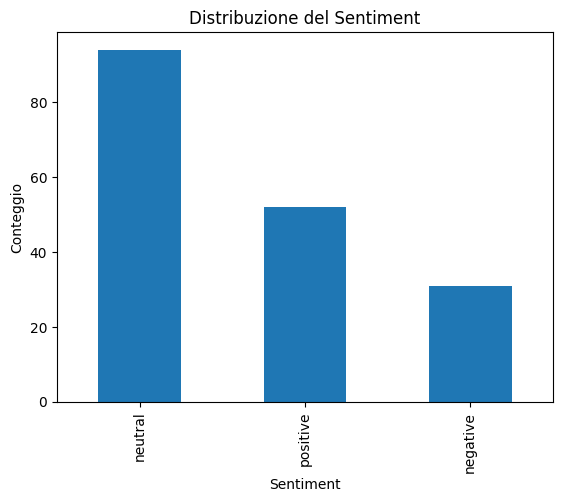

In [ ]:
# Distribuzione del sentiment
sentiment_distribution = results_df['sentiment'].value_counts()
print("Distribuzione del Sentiment:")
print(sentiment_distribution)

sentiment_distribution.plot(kind='bar', title='Distribuzione del Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Conteggio')
plt.show()


# Analisi per categoria di sentiment

In [ ]:
# Raggruppa le emoji per sentiment
grouped_emojis = results_df.groupby('sentiment')['emoji'].apply(list)
print("Emoji per Categoria di Sentiment:")
print(grouped_emojis)


Emoji per Categoria di Sentiment:
sentiment
negative    [😠, 👎, 😱😱😱, 💩💩💩💩, 💩💩, 💩, 😠😠😠😠😠😠, 🤮, 😠😠, 🤨😟😡😡😡😡...
neutral     [😲, 🙄, 😑, 😡, 🤔🤔🤔, 😅, 😳, 🤕, 😳😳😉, 😢, 🔹🔹, 👹, 🌿🌿, ...
positive    [🙂, 😁, 😂😂, 👍🏼, 😳🙄🤔🤓😂😂😂😂😂, 😄😄😄😄😄😄, 🔥🔥, 😊👍, 💖, 😈...
Name: emoji, dtype: object


# Visualizzazione

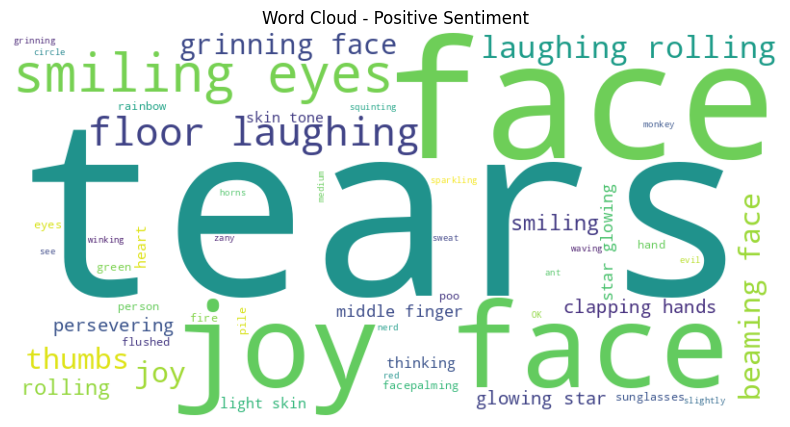

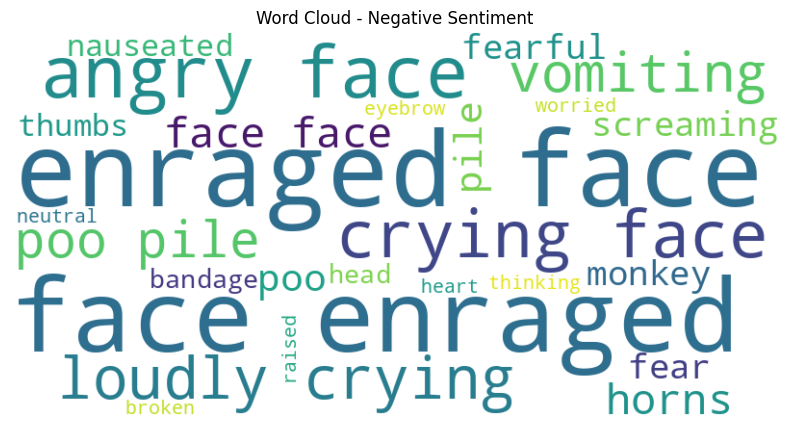

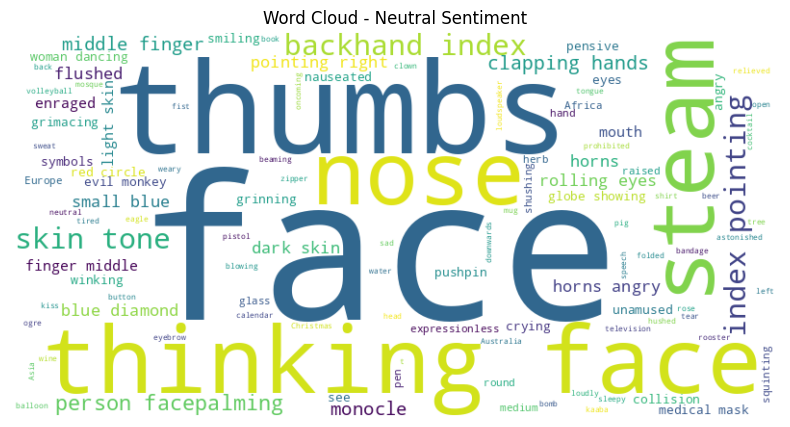

In [ ]:
for sentiment in ['positive', 'negative', 'neutral']:
    text = " ".join(results_df[results_df['sentiment'] == sentiment]['description'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud - {sentiment.capitalize()} Sentiment")
    plt.show()


# Frequenza emoji: combinazioni delle emoji come: "😂😂"

Distribuzione del Sentiment per Combinazioni:
sentiment
negative    24
neutral     54
positive    42
dtype: int64


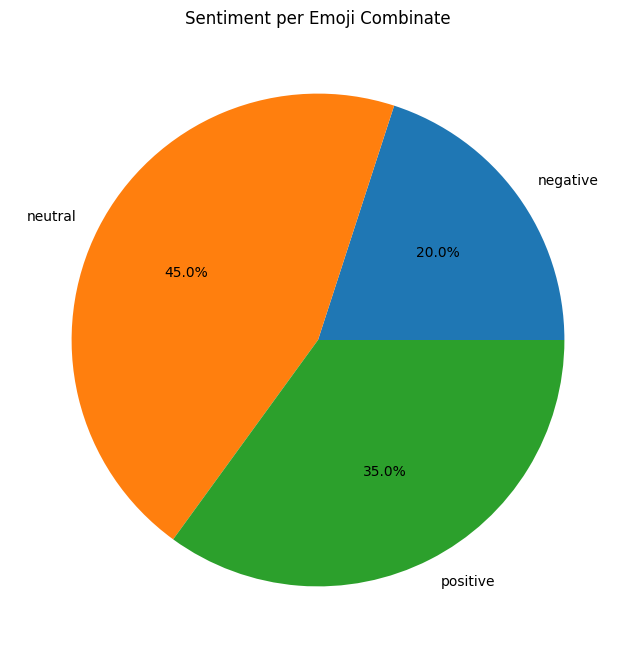

In [ ]:
results_df['is_combination'] = results_df['emoji'].apply(lambda x: len(x) > 1)
combined_sentiment = results_df[results_df['is_combination']].groupby('sentiment').size()

print("Distribuzione del Sentiment per Combinazioni:")
print(combined_sentiment)

combined_sentiment.plot(kind='pie', autopct='%1.1f%%', title="Sentiment per Emoji Combinate", figsize=(8, 8))
plt.show()


# Clustering

In [ ]:
# Calcolo TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(results_df['description'])


kmeans = KMeans(n_clusters=3, random_state=42)
results_df['cluster'] = kmeans.fit_predict(X)

pca = PCA(n_components=2, random_state=42)
X_reduced = pca.fit_transform(X.toarray())

results_df['x'] = X_reduced[:, 0]
results_df['y'] = X_reduced[:, 1]


fig = px.scatter(
    results_df,
    x='x',
    y='y',
    color='cluster',
    hover_data=['emoji', 'description'],
    title='Clustering delle Emoji',
    labels={'x': 'Dimensione 1', 'y': 'Dimensione 2'}
)
fig.show()


In [ ]:
components = pd.DataFrame(pca.components_, columns=vectorizer.get_feature_names_out())
top_words_dim1 = components.iloc[0].nlargest(10)
top_words_dim2 = components.iloc[1].nlargest(10)

print("Parole più rilevanti per la Dimensione 1:")
print(top_words_dim1)

print("Parole più rilevanti per la Dimensione 2:")
print(top_words_dim2)


Parole più rilevanti per la Dimensione 1:
with        0.460794
joy         0.362087
tears       0.362087
of          0.349573
face        0.348466
eyes        0.206557
smiling     0.202119
beaming     0.144441
thinking    0.078917
horns       0.059194
Name: 0, dtype: float64
Parole più rilevanti per la Dimensione 2:
enraged      0.682108
face         0.407353
thinking     0.137468
angry        0.124597
horns        0.083611
crying       0.065391
grimacing    0.056561
loudly       0.037105
pensive      0.028900
flushed      0.028536
Name: 1, dtype: float64


# 3D

In [ ]:
pca = PCA(n_components=3, random_state=42)
X_reduced_3d = pca.fit_transform(X.toarray())

# 3d
results_df['x'] = X_reduced_3d[:, 0]
results_df['y'] = X_reduced_3d[:, 1]
results_df['z'] = X_reduced_3d[:, 2]

fig = px.scatter_3d(
    results_df,
    x='x',
    y='y',
    z='z',
    color='cluster',
    hover_data=['emoji', 'description'],
    title='Clustering delle Emoji in 3D',
    labels={'x': 'Dimensione 1', 'y': 'Dimensione 2', 'z': 'Dimensione 3'}
)
fig.show()


In [ ]:
# Riduzione dimensionale a 3 componenti con t-SNE
tsne = TSNE(n_components=3, random_state=42)
X_tsne_3d = tsne.fit(X.toarray())

results_df['x'] = X_tsne_3d[:, 0]
results_df['y'] = X_tsne_3d[:, 1]
results_df['z'] = X_tsne_3d[:, 2]

fig = px.scatter_3d(
    results_df,
    x='x',
    y='y',
    z='z',
    color='cluster',
    hover_data=['emoji', 'description'],
    title='Clustering delle Emoji in 3D (t-SNE)',
    labels={'x': 'Dimensione 1', 'y': 'Dimensione 2', 'z': 'Dimensione 3'}
)
fig.show()


# SVM

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(results_df['description'])

y = results_df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y_train)
class_weights_dict = dict(zip(np.unique(y), class_weights))

svm_model = SVC(kernel='linear', class_weight=class_weights_dict, random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# Previsione del sentiment di nuove emoji
new_emoji_descriptions = [
    "face with tears of joy",
    "angry face",
    "sparkling heart"
]
new_X = vectorizer.transform(new_emoji_descriptions)
predictions = svm_model.predict(new_X)

print("Previsioni per nuove emoji:", predictions)


Accuracy: 0.8888888888888888
Classification Report:
               precision    recall  f1-score   support

    negative       0.86      1.00      0.92         6
     neutral       0.86      0.95      0.90        19
    positive       1.00      0.73      0.84        11

    accuracy                           0.89        36
   macro avg       0.90      0.89      0.89        36
weighted avg       0.90      0.89      0.89        36

Previsioni per nuove emoji: ['positive' 'negative' 'positive']


# Logistic regressor

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(results_df['description'])

y = results_df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y_train)
class_weights_dict = dict(zip(np.unique(y), class_weights))

log_reg_model = LogisticRegression(random_state=42, class_weight=class_weights_dict, max_iter=1000)
log_reg_model.fit(X_train, y_train)


y_pred = log_reg_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

new_emoji_descriptions = [
    "face with tears of joy",
    "angry face",
    "sparkling heart"
]
new_X = vectorizer.transform(new_emoji_descriptions)
predictions = log_reg_model.predict(new_X)

print("Previsioni per nuove emoji:", predictions)


Accuracy: 0.8888888888888888
Classification Report:
               precision    recall  f1-score   support

    negative       0.86      1.00      0.92         6
     neutral       0.89      0.89      0.89        19
    positive       0.90      0.82      0.86        11

    accuracy                           0.89        36
   macro avg       0.88      0.90      0.89        36
weighted avg       0.89      0.89      0.89        36

Previsioni per nuove emoji: ['positive' 'negative' 'positive']
